In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

# Read country-level geomtery with GEOID 

Counties boundary geometry from Census [TIGER/Line Shapefiles](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2024&layergroup=Counties+%28and+equivalent%29)
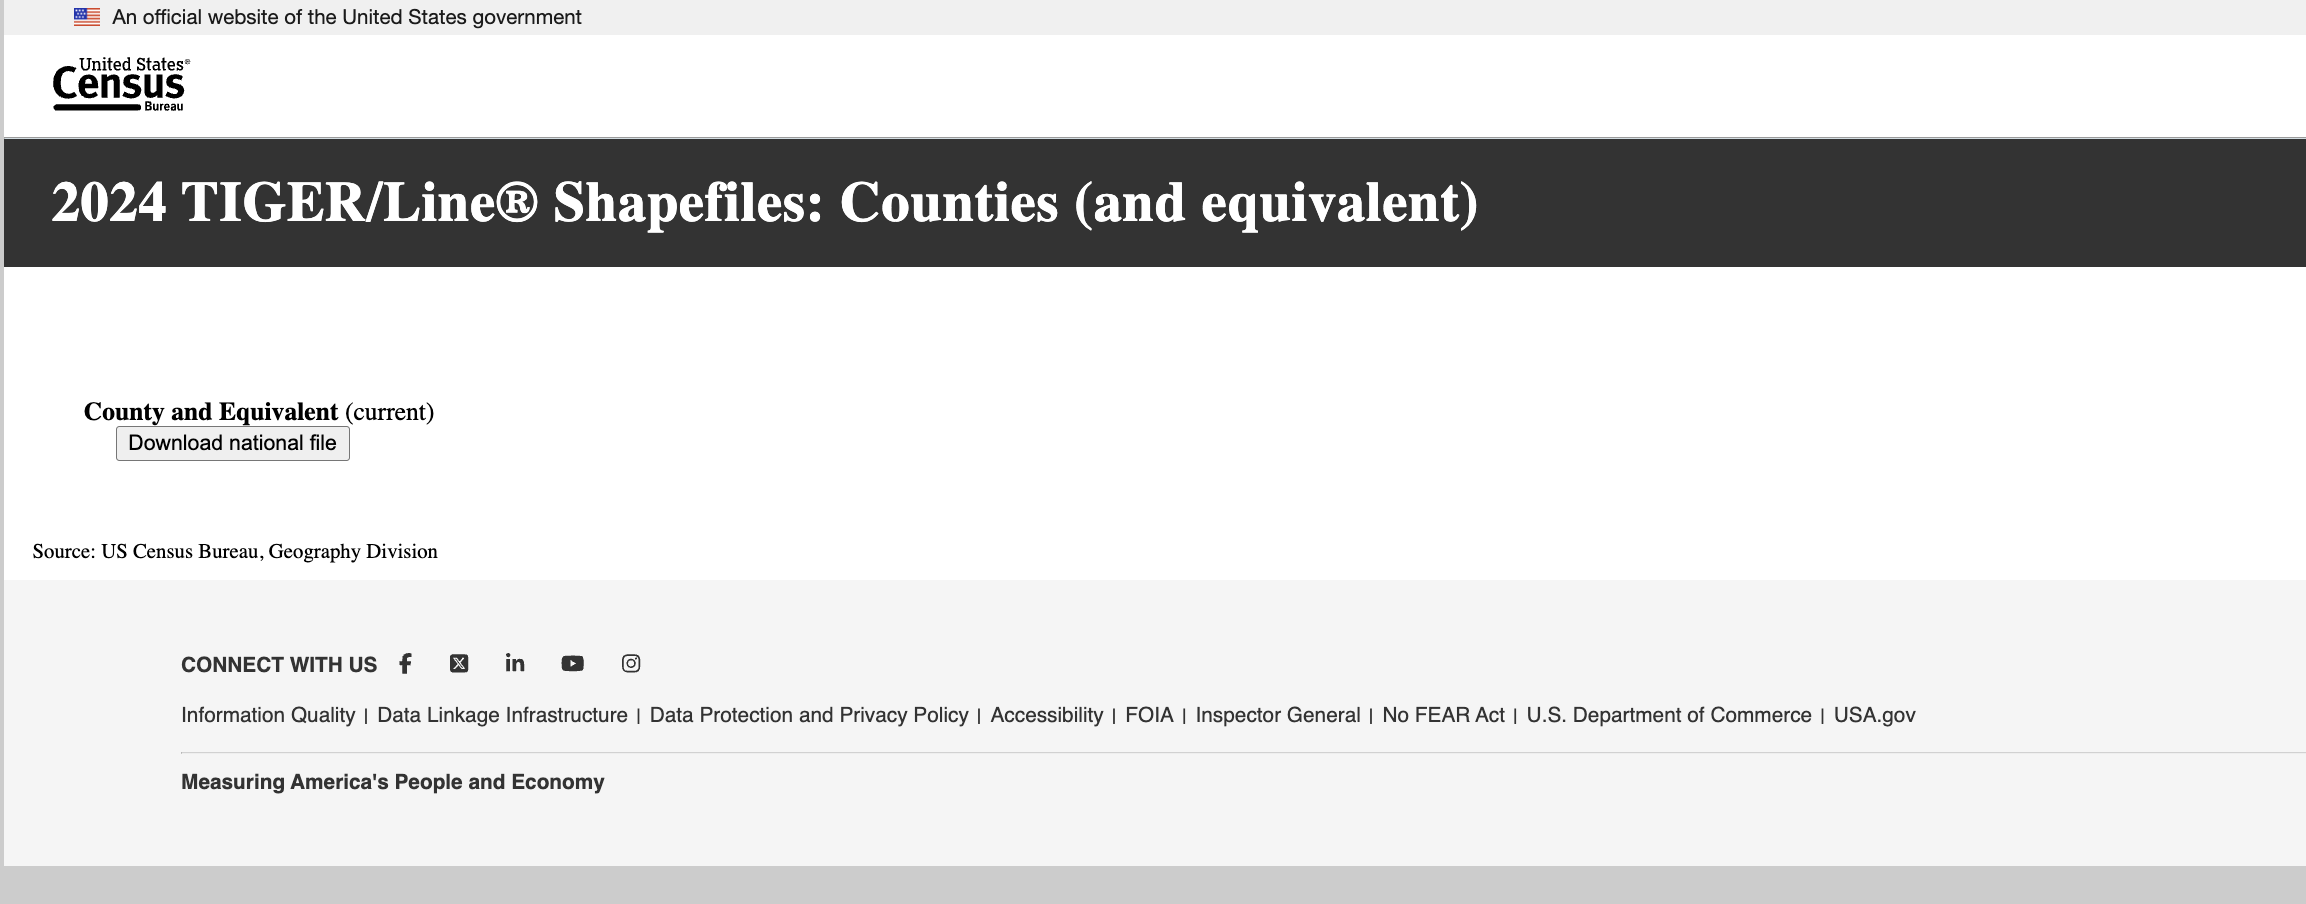

In [45]:
counties_us = gpd.read_file("/Users/houpuli/Downloads/tl_2024_us_counties.zip")
counties_us = counties_us.to_crs(epsg=4326)
counties_us

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72756 46.26449, -123.72756 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,NaN,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52329, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,0500000US13123,Gilmer,Gilmer County,06,H1,G4020,NaN,NaN,NaN,A,1103804462,12337139,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,0500000US27135,Roseau,Roseau County,06,H1,G4020,NaN,NaN,NaN,A,4329782927,16924046,+48.7610683,-095.8215042,"POLYGON ((-95.25858 48.88666, -95.25708 48.885..."
3232,28,089,00695768,28089,0500000US28089,Madison,Madison County,06,H1,G4020,298,27140,NaN,A,1849796735,72079469,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40025, -90.14890 32.400..."
3233,48,227,01383899,48227,0500000US48227,Howard,Howard County,06,H1,G4020,NaN,13700,NaN,A,2333034781,8846149,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [46]:
counties_us.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
selected_counties_id = ['55079','55133','34039','34023','08031','48029','08031'] 

for county_id in selected_counties_id:
    print(counties_us[counties_us['GEOID']==county_id]['NAME'].values[0])

Milwaukee
Waukesha
Union
Middlesex
Denver
Bexar
Denver


In [48]:
selected_counties = counties_us[counties_us['GEOID'].isin(selected_counties_id)]
selected_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
475,34,039,00882235,34039,0500000US34039,Union,Union County,06,H1,G4020,408,35620,35084,A,266165786,6839053,+40.6598707,-074.3086957,"POLYGON ((-74.20067 40.63290, -74.20240 40.631..."
615,48,029,01383800,48029,0500000US48029,Bexar,Bexar County,06,H1,G4020,484,41700,NaN,A,3212517260,40698142,+29.4486708,-098.5201465,"POLYGON ((-98.32720 29.20987, -98.32725 29.209..."
623,08,031,00198131,08031,0500000US08031,Denver,Denver County,06,H6,G4020,216,19740,NaN,C,396460145,4275563,+39.7618502,-104.8811054,"MULTIPOLYGON (((-104.93414 39.70018, -104.9328..."
687,55,079,01581100,55079,0500000US55079,Milwaukee,Milwaukee County,06,H1,G4020,376,33340,NaN,A,625371986,2455452227,+42.9126431,-087.8623115,"POLYGON ((-87.95925 43.19241, -87.95768 43.192..."
1035,34,023,00882230,34023,0500000US34023,Middlesex,Middlesex County,06,H1,G4020,408,35620,29484,A,800957688,35286675,+40.4396214,-074.4074303,"POLYGON ((-74.52668 40.55949, -74.52668 40.559..."
3088,55,133,01581126,55133,0500000US55133,Waukesha,Waukesha County,06,H1,G4020,376,33340,NaN,A,1423780693,79806617,+43.0183677,-088.3042404,"POLYGON ((-88.06725 43.01640, -88.06725 43.016..."


In [ ]:
# selected_counties.to_file('/Users/houpuli/Downloads/selected_counties.geojson', driver='GeoJSON')

In [8]:
county_55133 = selected_counties[selected_counties['GEOID'] == '55133']
xmin, ymin, xmax, ymax = county_55133.total_bounds

print(f"xmin: {xmin}")
print(f"xmax: {xmax}")
print(f"ymin: {ymin}")
print(f"ymax: {ymax}")

xmin: -88.54227495854344
xmax: -88.06335028956009
ymin: 42.841916935958814
ymax: 43.196050157244464


In [9]:
county_55079 = selected_counties[selected_counties['GEOID'] == '55079']
xmin, ymin, xmax, ymax = county_55079.total_bounds

print(f"xmin: {xmin}")
print(f"xmax: {xmax}")
print(f"ymin: {ymin}")
print(f"ymax: {ymax}")

xmin: -88.06994323360968
xmax: -87.06941334147038
ymin: 42.84212038309249
ymax: 43.192583870880476


In [27]:
county_08031 = selected_counties[selected_counties['GEOID'] == '08031']
xmin, ymin, xmax, ymax = county_08031.total_bounds

print(f"xmin: {xmin}")
print(f"xmax: {xmax}")
print(f"ymin: {ymin}")
print(f"ymax: {ymax}")

xmin: -105.10992397067463
xmax: -104.59958081658976
ymin: 39.61431200717453
ymax: 39.91418069672082


In [121]:
county_34039 = selected_counties[selected_counties['GEOID'] == '34039']
xmin, ymin, xmax, ymax = county_34039.total_bounds

print(f"xmin: {xmin}")
print(f"xmax: {xmax}")
print(f"ymin: {ymin}")
print(f"ymax: {ymax}")

xmin: -74.4632906629453
xmax: -74.13577490081516
ymin: 40.59192491481848
ymax: 40.739640229218104


In [122]:
county_48029 = selected_counties[selected_counties['GEOID'] == '48029']
xmin, ymin, xmax, ymax = county_48029.total_bounds

print(f"xmin: {xmin}")
print(f"xmax: {xmax}")
print(f"ymin: {ymin}")
print(f"ymax: {ymax}")

xmin: -98.8065565647809
xmax: -98.116907099743
ymin: 29.114433534248512
ymax: 29.760711217304635


In [123]:
county_34023 = selected_counties[selected_counties['GEOID'] == '34023']
xmin, ymin, xmax, ymax = county_34023.total_bounds

print(f"xmin: {xmin}")
print(f"xmax: {xmax}")
print(f"ymin: {ymin}")
print(f"ymax: {ymax}")

xmin: -74.6310353626039
xmax: -74.20329129486863
ymin: 40.25112195566696
ymax: 40.608682950381365


# Read in POI data

In [88]:
poi_points_us = pd.read_csv("/Users/houpuli/Redlining Lab Dropbox/Redlining Lab Team Folder/POI Dataset/combined_places_us.csv")
poi_points_us

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,bbox,geometry
0,tmp_500EB741CECBFF561AE1B94216F61766,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""7-Eleven"",""language"":""en""}]}",NaN,NaN,0.600000,NaN,"[{""locality"":""Wheaton"",""postcode"":""60187"",""fre...","{""minx"":-88.1112233,""maxx"":-88.1112233,""miny"":...",0x0101000000680355481E0756C00806103E94EE4440
1,tmp_DA8054A688D44D9E0EBE644B4D7FFA47,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cretex Specialty Products...",structural_engineer,"[""professional_services"",""shopping""]",0.606087,"[""http://www.cretexseals.com""]","[{""postcode"":""53188"",""freeform"":""N26W23800 Com...","{""minx"":-88.2207513,""maxx"":-88.2207513,""miny"":...",0x01010000002B830FCA200E56C01E8CD82780884540
2,tmp_BA9A84ABF48346A69ED91148D4C27D99,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Bao Mi"",""language"":""local...",restaurant,NaN,0.980592,NaN,"[{""locality"":""New Orleans"",""postcode"":""70112-2...","{""minx"":-90.0829409,""maxx"":-90.0829409,""miny"":...",0x01010000000D4059E74E8556C01E030D912EF53D40
3,tmp_711963EE7AEC75283BE841261ACB8C2C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Chevron Station Russellvi...",NaN,NaN,0.600000,NaN,"[{""locality"":""Russellville"",""postcode"":""35654""...","{""minx"":-87.6751775,""maxx"":-87.6751775,""miny"":...",0x0101000000AF5FB01B36EB55C038D32934B54B4140
4,tmp_F06F089E8728025E4177EFBB3AF322A7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Mobil"",""language"":""local""}]}",gas_station,"[""convenience_store"",""laboratory_testing""]",0.978300,"[""http://www.mobil.com""]","[{""locality"":""Sturgeon Bay"",""postcode"":""54235-...","{""minx"":-87.366155,""maxx"":-87.366155,""miny"":44...",0x0101000000159161156FD755C0147B681F2B6C4640
...,...,...,...,...,...,...,...,...,...,...,...
12792522,tmp_4E63260021AAA79A95CC1A605C8C950C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cook's Body & Mechanical""...",convenience_store,"[""automotive"",""automotive_repair""]",0.774474,"[""http://www.cooks1stopshop.com""]","[{""locality"":""St Paul"",""postcode"":""55109-2127""...","{""minx"":-93.024879,""maxx"":-93.024879,""miny"":45...",0x0101000000DCD6169E974157C00B0DC4B299814640
12792523,tmp_8640AFFBC0A4F7701C6F39F9ADC5D585,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Dick Smith Park"",""languag...",park,"[""public_plaza"",""topic_concert_venue""]",0.968883,"[""https://www.dicksmith.com.au""]","[{""postcode"":""64844"",""country"":""US""}]","{""minx"":-94.25566,""maxx"":-94.25566,""miny"":36.9...",0x01010000004EB9C2BB5C9057C0C68844A165754240
12792524,tmp_7444C2F2F44683A875C7FCF82F66FAF6,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""C&C Metal Products LLC"",""...",NaN,NaN,0.758897,NaN,"[{""locality"":""Saint Amant"",""postcode"":""70774"",...","{""minx"":-90.859734,""maxx"":-90.859734,""miny"":30...",0x01010000009850C1E105B756C0857CD0B359393E40
12792525,tmp_14B3B04000AE44C1F149FB58B1433128,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Leger's Cabinet Shop"",""la...",countertop_installation,"[""carpenter"",""construction_services""]",0.621023,"[""http://legerscabinets.com""]","[{""locality"":""Lafayette"",""postcode"":""70506-922...","{""minx"":-92.1177,""maxx"":-92.1177,""miny"":30.141...",0x01010000004FAF9465880757C007F0164850243E40


In [89]:
poi_points_us['WKB']=poi_points_us['geometry'].apply(lambda x: x[2:])
geometry = gpd.GeoSeries.from_wkb(poi_points_us['WKB'], crs=selected_counties.crs)

poi_points_us_g = gpd.GeoDataFrame(poi_points_us[['id', 'updatetime', 'version', 'names', 'cat_main', 'cat_alt',
                                    'confidence', 'websites', 'address']], geometry=geometry)

poi_points_us_g

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
0,tmp_500EB741CECBFF561AE1B94216F61766,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""7-Eleven"",""language"":""en""}]}",NaN,NaN,0.600000,NaN,"[{""locality"":""Wheaton"",""postcode"":""60187"",""fre...",POINT (-88.11122 41.86390)
1,tmp_DA8054A688D44D9E0EBE644B4D7FFA47,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cretex Specialty Products...",structural_engineer,"[""professional_services"",""shopping""]",0.606087,"[""http://www.cretexseals.com""]","[{""postcode"":""53188"",""freeform"":""N26W23800 Com...",POINT (-88.22075 43.06641)
2,tmp_BA9A84ABF48346A69ED91148D4C27D99,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Bao Mi"",""language"":""local...",restaurant,NaN,0.980592,NaN,"[{""locality"":""New Orleans"",""postcode"":""70112-2...",POINT (-90.08294 29.95774)
3,tmp_711963EE7AEC75283BE841261ACB8C2C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Chevron Station Russellvi...",NaN,NaN,0.600000,NaN,"[{""locality"":""Russellville"",""postcode"":""35654""...",POINT (-87.67518 34.59147)
4,tmp_F06F089E8728025E4177EFBB3AF322A7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Mobil"",""language"":""local""}]}",gas_station,"[""convenience_store"",""laboratory_testing""]",0.978300,"[""http://www.mobil.com""]","[{""locality"":""Sturgeon Bay"",""postcode"":""54235-...",POINT (-87.36616 44.84507)
...,...,...,...,...,...,...,...,...,...,...
12792522,tmp_4E63260021AAA79A95CC1A605C8C950C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cook's Body & Mechanical""...",convenience_store,"[""automotive"",""automotive_repair""]",0.774474,"[""http://www.cooks1stopshop.com""]","[{""locality"":""St Paul"",""postcode"":""55109-2127""...",POINT (-93.02488 45.01250)
12792523,tmp_8640AFFBC0A4F7701C6F39F9ADC5D585,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Dick Smith Park"",""languag...",park,"[""public_plaza"",""topic_concert_venue""]",0.968883,"[""https://www.dicksmith.com.au""]","[{""postcode"":""64844"",""country"":""US""}]",POINT (-94.25566 36.91716)
12792524,tmp_7444C2F2F44683A875C7FCF82F66FAF6,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""C&C Metal Products LLC"",""...",NaN,NaN,0.758897,NaN,"[{""locality"":""Saint Amant"",""postcode"":""70774"",...",POINT (-90.85973 30.22403)
12792525,tmp_14B3B04000AE44C1F149FB58B1433128,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Leger's Cabinet Shop"",""la...",countertop_installation,"[""carpenter"",""construction_services""]",0.621023,"[""http://legerscabinets.com""]","[{""locality"":""Lafayette"",""postcode"":""70506-922...",POINT (-92.11770 30.14185)


# Create mutilple files for each county

In [87]:
selected_counties_34039 = selected_counties[selected_counties['GEOID']=='34039']
selected_counties_48029 = selected_counties[selected_counties['GEOID']=='48029']
selected_counties_08031 = selected_counties[selected_counties['GEOID']=='08031']
selected_counties_55079 = selected_counties[selected_counties['GEOID']=='55079']
selected_counties_34023 = selected_counties[selected_counties['GEOID']=='34023']
selected_counties_55133 = selected_counties[selected_counties['GEOID']=='55133']
selected_counties_08031 = selected_counties[selected_counties['GEOID']=='08031']

# Spatial join to get POIs within selected counties

In [19]:
selected_poi_within_34039 = gpd.sjoin(poi_points_us_g, selected_counties_34039, how='inner', predicate='within')
selected_poi_within_34039 = selected_poi_within_34039[poi_points_us_g.columns]
selected_poi_within_34039.to_file('/Users/houpuli/Downloads/poi_within_34039.geojson', driver='GeoJSON')

In [22]:
selected_poi_within_34039

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
5864356,tmp_A576C15824CBCFE51C8E525A9305986B,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Saa cool air llc"",""langua...",NaN,NaN,0.600000,NaN,"[{""locality"":""Elizabeth"",""postcode"":""07206"",""f...",POINT (-74.18099 40.65197)
5864415,tmp_C4559BA3029298852C306CC96A99F735,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Angi Home Improvement LLC...",NaN,NaN,0.833677,NaN,"[{""locality"":""Garwood"",""postcode"":""07027"",""fre...",POINT (-74.32314 40.64977)
5864450,tmp_01DDAF1354B11E16EFDA04011D6F86CB,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Fast Home Buyers USA"",""la...",NaN,NaN,0.754835,NaN,"[{""locality"":""Roselle Park"",""postcode"":""07204""...",POINT (-74.26670 40.66361)
5864451,tmp_AB9D23ADD6267CC12CAC5DA613E37223,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Daunno Development Co"",""l...",NaN,NaN,0.600000,NaN,"[{""locality"":""Clark"",""postcode"":""07066"",""freef...",POINT (-74.30531 40.62207)
5864520,tmp_4AEB79CD187D058ACFBC4D82B937CD60,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Jeny Cleaning Services"",""...",home_cleaning,"[""carpet_cleaning"",""janitorial_services""]",0.493262,"[""http://jenycleansnj.com""]","[{""locality"":""Elizabeth"",""postcode"":""07208-311...",POINT (-74.22252 40.66738)
...,...,...,...,...,...,...,...,...,...,...
7191947,tmp_B7C6C3DA9C5B1F160BD4A51A34FFE6B8,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Law Offices of Darin D. P...",lawyer,NaN,0.958186,"[""https://dpintolaw.com""]","[{""locality"":""Westfield"",""postcode"":""07090-145...",POINT (-74.33576 40.64982)
7191956,tmp_C88EEECEE1D705D921787E6AFA2E6DCC,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Kennedy's Barber Club NJ""...",barber,"[""beauty_salon"",""beauty_and_spa""]",0.975305,"[""http://www.kennedysbarberclubnj.com""]","[{""locality"":""Summit"",""postcode"":""07901-2536"",...",POINT (-74.35854 40.71776)
7192059,tmp_FED74FA16A14D45D97864B7BA0F7BCC8,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Karate World Kenilworth"",...",martial_arts_club,"[""gym"",""active_life""]",0.999007,"[""http://www.karateworldnj.com/""]","[{""locality"":""Kenilworth"",""postcode"":""07033-17...",POINT (-74.28414 40.67775)
7192085,tmp_8331488211C2CB502D27C17EA9C70B0E,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Starbucks"",""language"":""en...",NaN,NaN,0.600000,NaN,"[{""locality"":""Union"",""postcode"":""07083"",""freef...",POINT (-74.29641 40.69241)


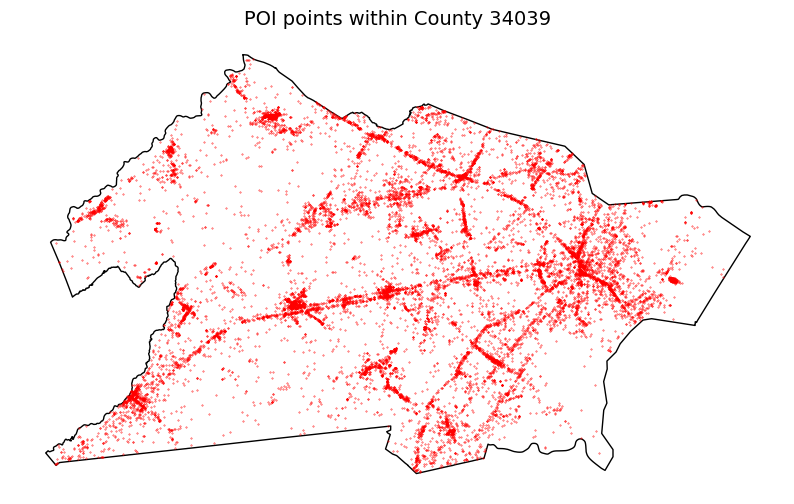

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

selected_counties_34039.plot(ax=ax, color='white', edgecolor='black')
selected_poi_within_34039.plot(ax=ax, color='red', markersize=0.1)

ax.set_title("POI points within County 34039", fontsize=14)
ax.set_axis_off()   

plt.show()

In [23]:
selected_poi_within_48029 = gpd.sjoin(poi_points_us_g, selected_counties_48029, how='inner', predicate='within')
selected_poi_within_48029 = selected_poi_within_48029[poi_points_us_g.columns]
selected_poi_within_48029.to_file('/Users/houpuli/Downloads/poi_within_48029.geojson', driver='GeoJSON')

In [25]:
selected_poi_within_48029

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
10429438,tmp_39F5BA3588DBBA170B71EA4FE818AAA3,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""ReNue Bandera"",""language""...",NaN,NaN,0.600000,NaN,"[{""locality"":""San Antonio"",""postcode"":""78238"",...",POINT (-98.61174 29.49020)
10429469,tmp_4653024F104FD0AF2D2E69493679419D,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""South TX Veterans Health ...",hospital,"[""professional_services"",""physical_therapy""]",0.376110,NaN,"[{""locality"":""San Antonio"",""postcode"":""78230-3...",POINT (-98.55397 29.52492)
10429483,tmp_C20F2EC7E351C098970289E18E59851F,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Ortiz Law Firm"",""language...",lawyer,"[""divorce_and_family_law"",""financial_service""]",0.972727,"[""https://www.lawyer.com/firm/ortiz-law-office...","[{""locality"":""San Antonio"",""postcode"":""78212-2...",POINT (-98.50663 29.46618)
10429494,tmp_801BF34A0E779702E7FF83722906B825,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""The Gardens At West Green...",event_planning,"[""event_planning"",""event_planning""]",0.993871,"[""http://www.thegardensatwestgreen.com""]","[{""locality"":""San Antonio"",""postcode"":""78256-9...",POINT (-98.62208 29.64208)
10429503,tmp_2D8EA5B1380C3561C86338E81CC7F3C4,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Darrell Atnip - Keller Wi...",real_estate_agent,NaN,0.347639,"[""http://darrellatnip.kw.com""]","[{""locality"":""San Antonio"",""postcode"":""78248-4...",POINT (-98.52996 29.60361)
...,...,...,...,...,...,...,...,...,...,...
12069168,tmp_655C780C803EE2A9FC5219193DEE4F05,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cinnabon"",""language"":""loc...",bakery,"[""desserts"",""restaurant""]",0.992551,"[""https://locations.cinnabon.com/tx/san-antoni...","[{""locality"":""San Antonio"",""postcode"":""78264"",...",POINT (-98.41511 29.21959)
12069181,tmp_E0A85446FC369F290BB947901BDCB105,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Monster Vape Embassy"",""la...",e_cigarette_store,"[""shopping"",""tobacco_shop""]",0.953517,"[""http://monstervape.com""]","[{""locality"":""San Antonio"",""postcode"":""78216-2...",POINT (-98.48766 29.56347)
12069284,tmp_821AD92A8A11484EE10F1ED4FAF4D24D,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Police Non-Emergency"",""la...",law_enforcement,"[""hospital""]",0.583105,"[""https://www.liveoaktx.net/departments/police...","[{""locality"":""Live Oak"",""postcode"":""78233-2930...",POINT (-98.32859 29.55361)
12069334,tmp_8CD70DA6EA636571DE70ED06E7CE7D33,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Lili Alessandra"",""languag...",furniture_store,"[""b2b_textiles""]",0.396084,"[""http://www.lilialessandra.com/""]","[{""locality"":""San Antonio"",""postcode"":""78247-3...",POINT (-98.42743 29.55881)


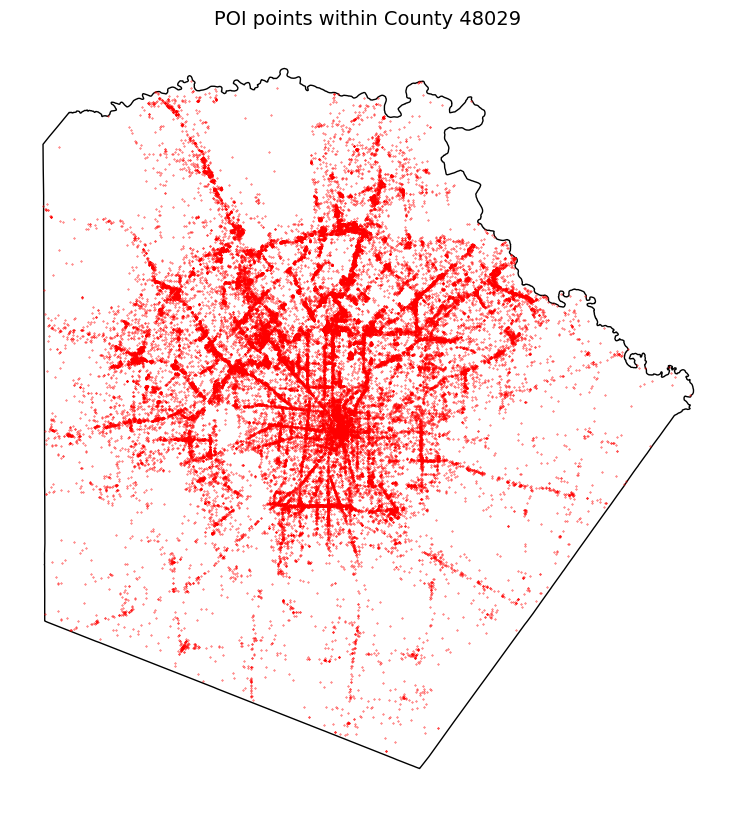

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

selected_counties_48029.plot(ax=ax, color='white', edgecolor='black')
selected_poi_within_48029.plot(ax=ax, color='red', markersize=0.1)

ax.set_title("POI points within County 48029", fontsize=14)
ax.set_axis_off()   

plt.show()

In [26]:
selected_poi_within_08031 = gpd.sjoin(poi_points_us_g, selected_counties_08031, how='inner', predicate='within')
selected_poi_within_08031 = selected_poi_within_08031[poi_points_us_g.columns]
selected_poi_within_08031.to_file('/Users/houpuli/Downloads/poi_within_08031.geojson', driver='GeoJSON')

In [27]:
selected_poi_within_08031

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
10093545,tmp_30A4D723EF3C3510696F7FAFD64CE831,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Saint Joseph Hospital Den...",hospital,"[""health_and_medical"",""emergency_room""]",0.996998,"[""https://www.sclhealth.org/locations/saint-jo...","[{""locality"":""Denver"",""postcode"":""80218-1114"",...",POINT (-104.97156 39.74640)
10093562,tmp_65EEE72C166AE424396A4AE7970E60A9,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Denver Athletic Massage"",...",spas,"[""professional_services""]",0.679001,"[""http://www.denverathleticmassage.com""]","[{""locality"":""Centennial"",""postcode"":""80111-67...",POINT (-104.94538 39.73485)
10093575,tmp_3A7205AC09CDC330CF0D5CB0A7F1030B,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Brows & Beauty Med Spa"",""...",spas,"[""beauty_salon"",""beauty_and_spa""]",0.975154,"[""http://www.bnbmedspa.com/""]","[{""locality"":""Denver"",""postcode"":""80237-1805"",...",POINT (-104.88217 39.65001)
10093579,tmp_9901BA9DA1A12B373EB44FBC708355B4,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""MySanctuary"",""language"":""...",event_planning,"[""professional_services"",""business_advertising""]",0.557490,NaN,"[{""locality"":""Denver"",""postcode"":""80203-2731"",...",POINT (-104.98523 39.73019)
10093588,tmp_C99B72B7F6AF1561C11FEF91D95CCC38,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""UPS Access Point location...",NaN,NaN,0.600000,NaN,"[{""locality"":""Denver"",""postcode"":""80238"",""free...",POINT (-104.88240 39.78950)
...,...,...,...,...,...,...,...,...,...,...
10429389,tmp_CD53F60C6B7139F5F40ECE0834BFFFA3,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""West Elm"",""language"":""loc...",furniture_store,"[""home_goods_store""]",0.998783,"[""http://www.westelm.com""]","[{""locality"":""Denver"",""postcode"":""80206-5609"",...",POINT (-104.95257 39.71844)
10429392,tmp_B3D5B7CC490C11BE5135ECEA4EDD01B7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""St Andrew Avellino Semina...",church_cathedral,"[""religious_organization"",""religious_organizat...",0.993951,"[""http://www.theatinesusa.com/home.html""]","[{""locality"":""Denver"",""postcode"":""80246-2601"",...",POINT (-104.93610 39.69722)
10429399,tmp_BBA51E76BE82635CE99EF6662CE55BEB,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cosmic Snacks"",""language""...",restaurant,NaN,0.573770,"[""http://www.cosmicsnacksdenver.com/""]","[{""locality"":""Denver"",""postcode"":""80205-2911"",...",POINT (-104.97894 39.75431)
10429412,tmp_8D775646DB64A752D25AB761DA4565DF,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Globeville Landing Park"",...",park,NaN,0.994267,"[""https://www.denvergov.org/.../globeville-lan...",NaN,POINT (-104.97735 39.77669)


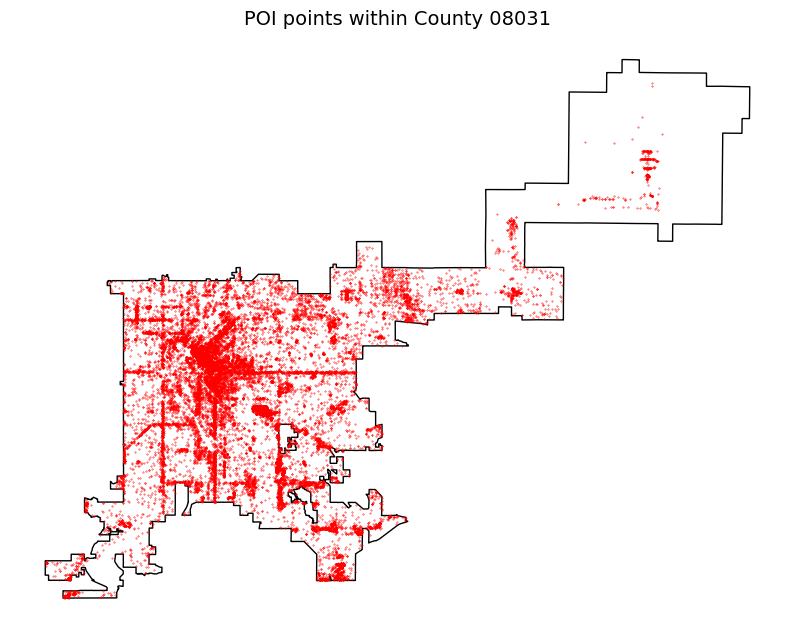

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

selected_counties_08031.plot(ax=ax, color='white', edgecolor='black')
selected_poi_within_08031.plot(ax=ax, color='red', markersize=0.1)

ax.set_title("POI points within County 08031", fontsize=14)
ax.set_axis_off()   

plt.show()

In [29]:
selected_poi_within_55079 = gpd.sjoin(poi_points_us_g, selected_counties_55079, how='inner', predicate='within')
selected_poi_within_55079 = selected_poi_within_55079[poi_points_us_g.columns]
selected_poi_within_55079.to_file('/Users/houpuli/Downloads/poi_within_55079.geojson', driver='GeoJSON')

In [30]:
selected_poi_within_55079

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
8,tmp_22A4A8C12FCFEAB7AB9F75745288C359,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Milwaukee Housing Authori...",public_and_government_association,"[""social_service_organizations"",""public_servic...",0.856949,"[""https://www.hacm.org/home/components/facilit...","[{""locality"":""Milwaukee"",""postcode"":""53208-412...",POINT (-87.95490 43.03315)
49,tmp_EF904703F703A457793FAD0EE6D9FE24,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Misty Lesnjak, NP"",""langu...",NaN,NaN,0.600000,NaN,"[{""locality"":""Wauwatosa"",""postcode"":""53213"",""f...",POINT (-88.00920 43.04660)
87,tmp_D5FCB74F2428F58697958A4119720548,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""One Direction Baptist Chu...",baptist_church,"[""church_cathedral"",""religious_organization""]",0.867176,NaN,"[{""locality"":""Milwaukee"",""postcode"":""53216-232...",POINT (-87.97535 43.08864)
115,tmp_5F8B4153FCE3C45A4B746737824AD5EA,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""America Works Of Wisconsi...",community_services_non_profits,"[""professional_services"",""professional_services""]",0.834828,NaN,"[{""locality"":""Milwaukee"",""postcode"":""53203-220...",POINT (-87.91457 43.05563)
167,tmp_613D8C0661BECE72C105F6D91BC6E30C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Payless ShoeSource"",""lang...",NaN,NaN,0.600000,NaN,"[{""locality"":""Milwaukee"",""postcode"":""53203"",""f...",POINT (-87.91428 43.03878)
...,...,...,...,...,...,...,...,...,...,...
1149557,tmp_EF391B71A1F24D4F2A1D06F73D895123,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cost Cutters"",""language"":...",NaN,NaN,0.600000,NaN,"[{""locality"":""West Allis"",""postcode"":""53214"",""...",POINT (-88.02681 43.01617)
1149560,tmp_E3CB27424029646B9033175583B5D955,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Milw Medical Bl"",""languag...",pharmacy,"[""hospital"",""health_and_medical""]",0.312085,NaN,"[{""locality"":""Milwaukee"",""postcode"":""53208-330...",POINT (-87.95743 43.03995)
1149561,tmp_BFF9CB817850F58452CC77A54BAF7B0B,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Juneau Monument"",""languag...",fountain,NaN,0.679943,NaN,NaN,POINT (-87.89827 43.04280)
1149576,tmp_C35601947F16E4B50898C0FE3FB9465D,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Grant Elementary"",""langua...",elementary_school,"[""school"",""public_school""]",0.989574,"[""http://www5.milwaukee.k12.wi.us/school/grant""]","[{""locality"":""Milwaukee"",""postcode"":""53215-244...",POINT (-87.95112 43.00566)


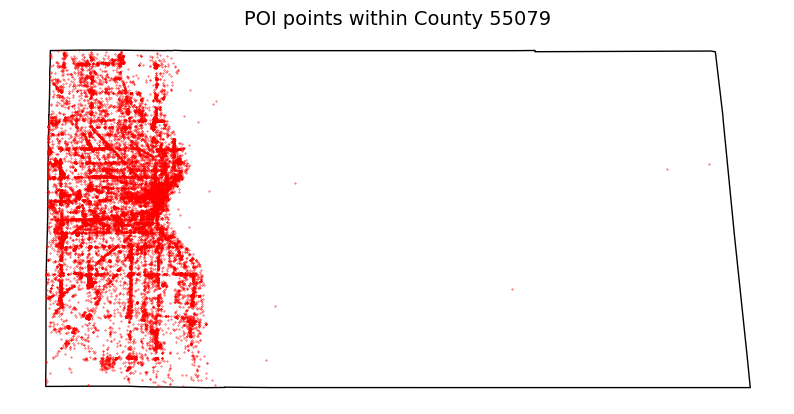

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

selected_counties_55079.plot(ax=ax, color='white', edgecolor='black')
selected_poi_within_55079.plot(ax=ax, color='red', markersize=0.1)

ax.set_title("POI points within County 55079", fontsize=14)
ax.set_axis_off()   

plt.show()

In [32]:
selected_poi_within_34023 = gpd.sjoin(poi_points_us_g, selected_counties_34023, how='inner', predicate='within')
selected_poi_within_34023 = selected_poi_within_34023[poi_points_us_g.columns]
selected_poi_within_34023.to_file('/Users/houpuli/Downloads/poi_within_34023.geojson', driver='GeoJSON')

In [33]:
selected_poi_within_34023

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
5864285,tmp_15A280FE0A9DA868EC1FAE113787465F,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""T-Mobile"",""language"":""loc...",mobile_phone_store,"[""electronics"",""telecommunications_company""]",0.994657,"[""https://www.t-mobile.com/stores/bd/t-mobile-...","[{""locality"":""Carteret"",""postcode"":""07008-1880...",POINT (-74.23046 40.59068)
5864365,tmp_24DC3856BF4AEBD7DAA5877C58601EC2,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""JAN X-Ray Services"",""lang...",industrial_company,"[""shopping"",""health_and_medical""]",0.526480,"[""http://www.janxndt.com""]","[{""locality"":""East Brunswick"",""postcode"":""0881...",POINT (-74.40716 40.47310)
5864416,tmp_272F8DA9D16BA672CCDF5994CE824168,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Riva's BBQ Restaurant"",""l...",barbecue_restaurant,"[""latin_american_restaurant"",""steakhouse""]",0.998012,"[""https://rivas-barbecue.hub.biz""]","[{""locality"":""Perth Amboy"",""postcode"":""08861-4...",POINT (-74.26792 40.51028)
5864439,tmp_0CD2C8FC19D04EE358DD26218CF54E96,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Lydia David DMD"",""languag...",dentist,"[""cosmetic_dentist"",""doctor""]",0.989948,NaN,"[{""locality"":""Perth Amboy"",""postcode"":""08861-4...",POINT (-74.26744 40.50961)
5864622,tmp_2A1E3B4C92117528CBD2E5C28C821489,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""A&J Auto Detailing"",""lang...",auto_detailing,"[""car_window_tinting"",""carpet_cleaning""]",0.975219,"[""http://www.ajautodetailingnj.com""]","[{""locality"":""Matawan"",""postcode"":""07747-2172""...",POINT (-74.28380 40.42505)
...,...,...,...,...,...,...,...,...,...,...
7191923,tmp_24CC01900528BFA3FA828D7BBF8DFDB1,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Memorial Park"",""language""...",NaN,NaN,0.966662,NaN,NaN,POINT (-74.36487 40.53749)
7192014,tmp_292A9C8AB18396F5A0D24AAB2017BE0C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""American Jersey Builders""...",NaN,NaN,0.600000,NaN,"[{""locality"":""Monroe"",""postcode"":""08831"",""free...",POINT (-74.40936 40.31716)
7192022,tmp_33186A737FE3A15736AEC8623CE9A031,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Metuchen Pizza"",""language...",NaN,NaN,0.600000,NaN,"[{""locality"":""Metuchen"",""postcode"":""08840"",""fr...",POINT (-74.36657 40.53982)
7192057,tmp_F7515BD1AD8405C70557CE162B67F3C5,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Sayreville Station, New J...",landmark_and_historical_building,NaN,0.757575,NaN,"[{""country"":""US""}]",POINT (-74.35389 40.47278)


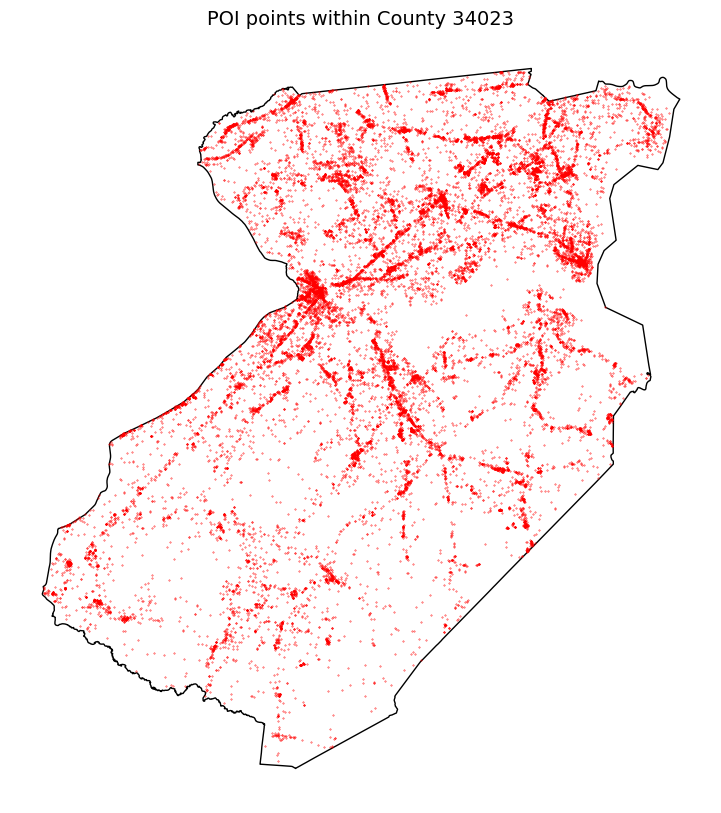

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

selected_counties_34023.plot(ax=ax, color='white', edgecolor='black')
selected_poi_within_34023.plot(ax=ax, color='red', markersize=0.1)

ax.set_title("POI points within County 34023", fontsize=14)
ax.set_axis_off()   

plt.show()

In [35]:
selected_poi_within_55133 = gpd.sjoin(poi_points_us_g, selected_counties_55133, how='inner', predicate='within')
selected_poi_within_55133 = selected_poi_within_55133[poi_points_us_g.columns]
selected_poi_within_55133.to_file('/Users/houpuli/Downloads/poi_within_55133.geojson', driver='GeoJSON')

In [36]:
selected_poi_within_55133

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
1,tmp_DA8054A688D44D9E0EBE644B4D7FFA47,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cretex Specialty Products...",structural_engineer,"[""professional_services"",""shopping""]",0.606087,"[""http://www.cretexseals.com""]","[{""postcode"":""53188"",""freeform"":""N26W23800 Com...",POINT (-88.22075 43.06641)
46,tmp_7CA28245C3DC507BF62F6D9A639D0B75,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Amada Senior Care"",""langu...",retirement_home,"[""health_department"",""home_health_care""]",0.983817,"[""http://amadaseniorcare.com/milwaukee-senior-...","[{""locality"":""Brookfield"",""postcode"":""53005-59...",POINT (-88.12006 43.03620)
96,tmp_75940D8C3F0955BDAC2E194766B50223,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Hygeia Spring"",""language""...",structure_and_geography,"[""sports_and_recreation_venue"",""real_estate_se...",0.936072,NaN,"[{""locality"":""Big Bend"",""postcode"":""53103-9551...",POINT (-88.20493 42.88001)
172,tmp_C979F15F208282BD89F7876D7FE08696,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Thirsty Bird Saloon"",""lan...",bar,"[""bar_and_grill_restaurant"",""pub""]",0.995646,"[""http://www.otownthirstybird.com""]","[{""locality"":""Oconomowoc"",""postcode"":""53066-52...",POINT (-88.49927 43.10971)
217,tmp_13745F76BE19C39E62850D24AF553EBD,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Sussex Chiropractic"",""lan...",naturopathic_holistic,"[""chiropractor"",""health_and_medical""]",0.991600,"[""http://www.sussexchiropractic.com""]","[{""locality"":""Sussex"",""postcode"":""53089-3833"",...",POINT (-88.21472 43.13215)
...,...,...,...,...,...,...,...,...,...,...
1149606,tmp_A75086590E0609110CA83225CD117F5E,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Chabad of Waukesha - Broo...",community_services_non_profits,NaN,0.896653,"[""http://jewishwaukesha.com""]","[{""locality"":""Brookfield"",""postcode"":""53045-52...",POINT (-88.16716 43.04816)
1149681,tmp_255AF8F922300BC4F9438CAF458CB21D,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Goody Two Shooz"",""languag...",NaN,NaN,0.600000,NaN,"[{""locality"":""Brookfield"",""postcode"":""53045"",""...",POINT (-88.14589 43.07214)
1149701,tmp_40AF967C87F36C501D0AFE29C4AD7781,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cal Tattoo"",""language"":""l...",tattoo_and_piercing,"[""barber""]",0.982441,"[""https://www.caltattoo.co/""]","[{""locality"":""Menomonee Falls"",""postcode"":""530...",POINT (-88.11176 43.17426)
1149736,tmp_82D5B267B9AA5B5782D8EFD2C4328DE3,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Lisa Schultz DR"",""languag...",NaN,NaN,0.600000,NaN,"[{""locality"":""Brookfield"",""postcode"":""53005"",""...",POINT (-88.08289 43.07502)


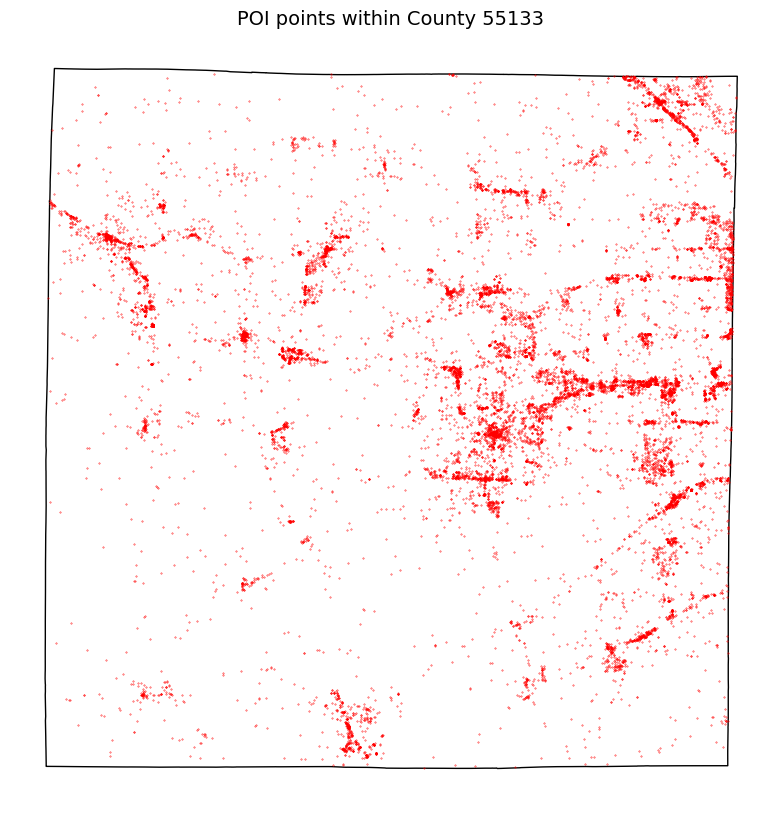

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

selected_counties_55133.plot(ax=ax, color='white', edgecolor='black')
selected_poi_within_55133.plot(ax=ax, color='red', markersize=0.1)

ax.set_title("POI points within County 55133", fontsize=14)
ax.set_axis_off()   

plt.show()

# POI accuracy check

In [16]:
poi_points_55133 = pd.read_csv("/Users/houpuli/Downloads/SQL script_place_55133.csv")
poi_points_55133['WKB']=poi_points_55133['geometry'].apply(lambda x: x[2:])
geometry = gpd.GeoSeries.from_wkb(poi_points_55133['WKB'], crs=selected_counties.crs)

poi_55133 = gpd.GeoDataFrame(poi_points_55133, geometry=geometry)
poi_55133.to_file('/Users/houpuli/Downloads/poi_55133.geojson', driver='GeoJSON')

In [18]:
ft_points_55133 = pd.read_csv("/Users/houpuli/Downloads/SQL script_building_footprint.csv")
ft_points_55133['WKB']=ft_points_55133['geometry'].apply(lambda x: x[2:])
geometry = gpd.GeoSeries.from_wkb(ft_points_55133['WKB'], crs=selected_counties.crs)

ft_55133 = gpd.GeoDataFrame(ft_points_55133, geometry=geometry)
ft_55133.to_file('/Users/houpuli/Downloads/ft_55133.geojson', driver='GeoJSON')

# Footprint Check in Denvor

In [68]:
denvor_footprint = pd.read_csv('/Users/houpuli/Downloads/denvor.csv', header=None)
denvor_footprint = denvor_footprint[0].str.split(',', expand=True)
denvor_footprint.columns = ['subtype', 'building_class', 'geometry']
denvor_footprint = denvor_footprint.iloc[1:].reset_index(drop=True)
denvor_footprint = denvor_footprint.replace("NULL", np.nan)
denvor_footprint['WKB'] = denvor_footprint['geometry'].apply(lambda x: x[2:])
geometry = gpd.GeoSeries.from_wkb(denvor_footprint['WKB'], crs=selected_counties.crs)
denvor_footprint_gdf = gpd.GeoDataFrame(denvor_footprint, geometry=geometry)
denvor_footprint_gdf = denvor_footprint_gdf.drop(columns='WKB')
denvor_footprint_gdf

,subtype,building_class,geometry
0,NaN,NaN,"POLYGON ((-105.10904 39.61485, -105.10905 39.6..."
1,NaN,NaN,"POLYGON ((-105.10927 39.61512, -105.10918 39.6..."
2,NaN,NaN,"POLYGON ((-105.10938 39.61503, -105.10929 39.6..."
3,NaN,NaN,"POLYGON ((-105.10895 39.61538, -105.10901 39.6..."
4,NaN,NaN,"POLYGON ((-105.10909 39.61578, -105.10906 39.6..."
...,...,...,...
671781,NaN,NaN,"POLYGON ((-104.65738 39.90372, -104.65678 39.9..."
671782,NaN,NaN,"POLYGON ((-104.65447 39.90471, -104.65447 39.9..."
671783,NaN,NaN,"POLYGON ((-104.65328 39.90425, -104.65328 39.9..."
671784,NaN,NaN,"POLYGON ((-104.60250 39.91300, -104.60250 39.9..."


In [75]:
denvor_footprint_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

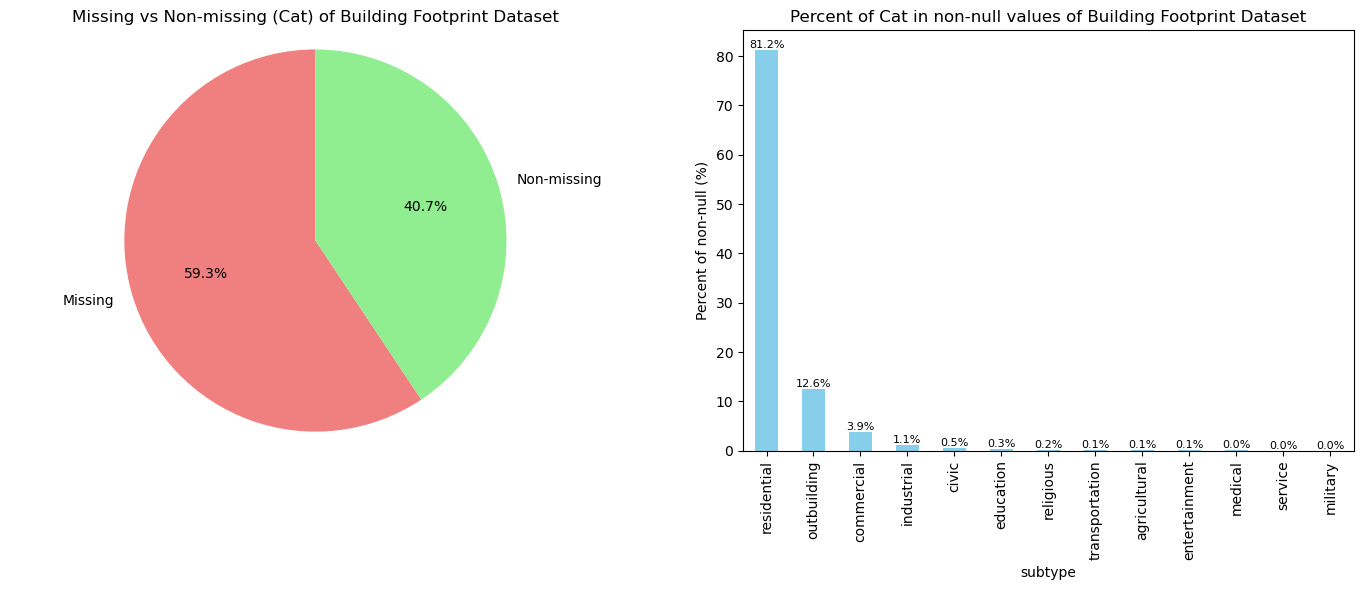

In [109]:
df = denvor_footprint_gdf.copy()
total = len(df)
null_count = df['subtype'].isna().sum()
non_null_count = total - null_count

null_pct = null_count / total * 100
non_null_pct = non_null_count / total * 100

null_summary = pd.Series(
    [null_count, non_null_count],
    index=['Missing', 'Non-missing']
)

non_null = df['subtype'].dropna()
unique_pct = (non_null.value_counts(normalize=True) * 100).sort_values(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(
    null_summary,
    labels=null_summary.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#f08080', '#90ee90']
)
axes[0].axis('equal')
axes[0].set_title("Missing vs Non-missing (Cat) of Building Footprint Dataset")

unique_pct.plot(
    kind='bar',
    ax=axes[1],
    color='#87ceeb'
)
axes[1].set_ylabel('Percent of non-null (%)')
axes[1].set_title(f"Percent of Cat in non-null values of Building Footprint Dataset")
axes[1].tick_params(axis='x', rotation=90)

for i, v in enumerate(unique_pct.values):
    axes[1].text(i, v, f"{v:.1f}%", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# POI Check in Denvor

In [90]:
selected_poi_within_08031 = gpd.sjoin(poi_points_us_g, selected_counties_08031, how='inner', predicate='within')
selected_poi_within_08031 = selected_poi_within_08031[poi_points_us_g.columns]
selected_poi_within_08031

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
10093545,tmp_30A4D723EF3C3510696F7FAFD64CE831,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Saint Joseph Hospital Den...",hospital,"[""health_and_medical"",""emergency_room""]",0.996998,"[""https://www.sclhealth.org/locations/saint-jo...","[{""locality"":""Denver"",""postcode"":""80218-1114"",...",POINT (-104.97156 39.74640)
10093562,tmp_65EEE72C166AE424396A4AE7970E60A9,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Denver Athletic Massage"",...",spas,"[""professional_services""]",0.679001,"[""http://www.denverathleticmassage.com""]","[{""locality"":""Centennial"",""postcode"":""80111-67...",POINT (-104.94538 39.73485)
10093575,tmp_3A7205AC09CDC330CF0D5CB0A7F1030B,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Brows & Beauty Med Spa"",""...",spas,"[""beauty_salon"",""beauty_and_spa""]",0.975154,"[""http://www.bnbmedspa.com/""]","[{""locality"":""Denver"",""postcode"":""80237-1805"",...",POINT (-104.88217 39.65001)
10093579,tmp_9901BA9DA1A12B373EB44FBC708355B4,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""MySanctuary"",""language"":""...",event_planning,"[""professional_services"",""business_advertising""]",0.557490,NaN,"[{""locality"":""Denver"",""postcode"":""80203-2731"",...",POINT (-104.98523 39.73019)
10093588,tmp_C99B72B7F6AF1561C11FEF91D95CCC38,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""UPS Access Point location...",NaN,NaN,0.600000,NaN,"[{""locality"":""Denver"",""postcode"":""80238"",""free...",POINT (-104.88240 39.78950)
...,...,...,...,...,...,...,...,...,...,...
10429389,tmp_CD53F60C6B7139F5F40ECE0834BFFFA3,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""West Elm"",""language"":""loc...",furniture_store,"[""home_goods_store""]",0.998783,"[""http://www.westelm.com""]","[{""locality"":""Denver"",""postcode"":""80206-5609"",...",POINT (-104.95257 39.71844)
10429392,tmp_B3D5B7CC490C11BE5135ECEA4EDD01B7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""St Andrew Avellino Semina...",church_cathedral,"[""religious_organization"",""religious_organizat...",0.993951,"[""http://www.theatinesusa.com/home.html""]","[{""locality"":""Denver"",""postcode"":""80246-2601"",...",POINT (-104.93610 39.69722)
10429399,tmp_BBA51E76BE82635CE99EF6662CE55BEB,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cosmic Snacks"",""language""...",restaurant,NaN,0.573770,"[""http://www.cosmicsnacksdenver.com/""]","[{""locality"":""Denver"",""postcode"":""80205-2911"",...",POINT (-104.97894 39.75431)
10429412,tmp_8D775646DB64A752D25AB761DA4565DF,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Globeville Landing Park"",...",park,NaN,0.994267,"[""https://www.denvergov.org/.../globeville-lan...",NaN,POINT (-104.97735 39.77669)


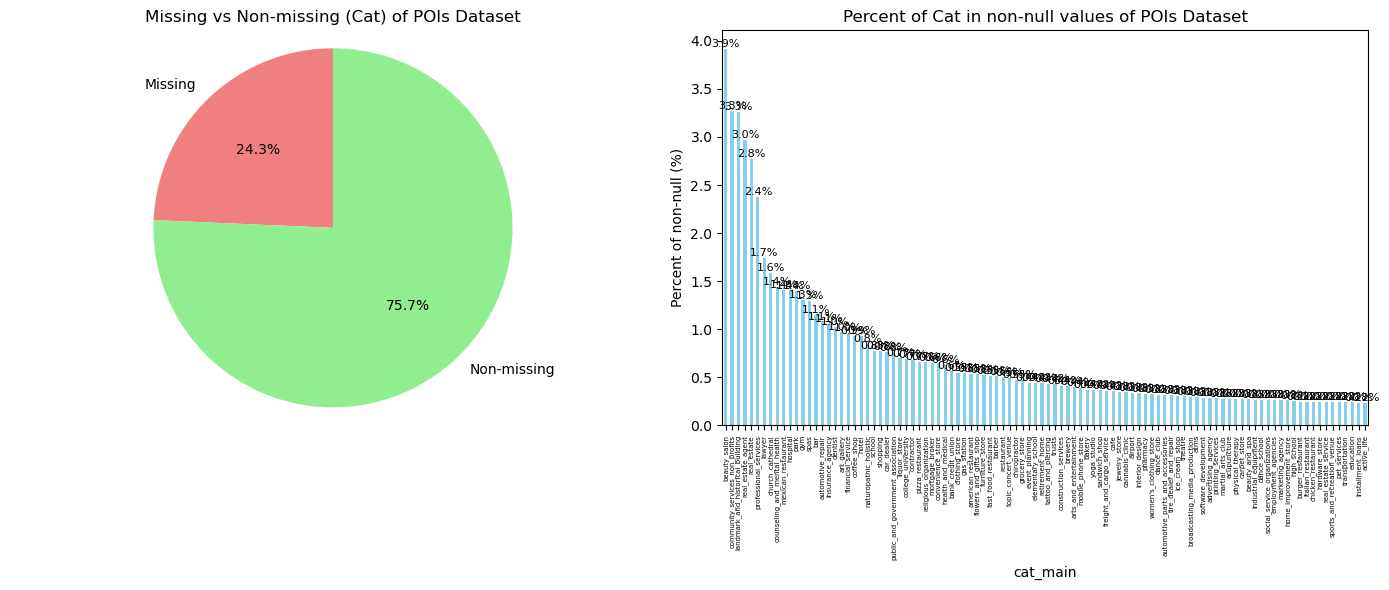

In [113]:
df_2 = selected_poi_within_08031.copy()
total = len(df_2)
null_count = df_2['cat_main'].isna().sum()
non_null_count = total - null_count

null_pct = null_count / total * 100
non_null_pct = non_null_count / total * 100

null_summary = pd.Series(
    [null_count, non_null_count],
    index=['Missing', 'Non-missing']
)

non_null = df_2['cat_main'].dropna()
unique_pct = (non_null.value_counts(normalize=True) * 100).sort_values(ascending=False)

top_n = 100
unique_pct_top = unique_pct.head(top_n)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(
    null_summary,
    labels=null_summary.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#f08080', '#90ee90']
)
axes[0].axis('equal')
axes[0].set_title("Missing vs Non-missing (Cat) of POIs Dataset")

unique_pct_top.plot(
    kind='bar',
    ax=axes[1],
    color='#87ceeb'
)
axes[1].set_ylabel('Percent of non-null (%)')
axes[1].set_title(f"Percent of Cat in non-null values of POIs Dataset")
axes[1].tick_params(axis='x', rotation=90, labelsize=5)


for i, v in enumerate(unique_pct_top.values):
    axes[1].text(i, v, f"{v:.1f}%", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [115]:
denvor_footprint_gdf.to_file('/Users/houpuli/Downloads/Denver_Building_Cat.geojson',driver='GeoJSON')

In [ ]:
SELECT *
FROM OPENROWSET(
  BULK 'https://overturemapswestus2.blob.core.windows.net/release/2025-09-24.0/theme=buildings/type=building/',
  FORMAT = 'PARQUET'
) WITH (
  id      VARCHAR(100),
  height      VARCHAR(100),
  num_floors  VARCHAR(100),
  subtype     VARCHAR(100),
  [class]     VARCHAR(100),
  [version]   VARCHAR(100),
  sources     VARCHAR(MAX),
  bbox        VARCHAR(200),
  geometry    VARBINARY(MAX)
) AS r
-- WHERE
--     TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.xmin')) > -105.07642
-- AND TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.xmax')) < -104.91334
-- AND TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.ymin')) > 39.70626
-- AND TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.ymax')) < 39.78677;

WHERE
    TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.xmin')) > -74.6310353626039
AND TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.xmax')) < -74.20329129486863
AND TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.ymin')) > 40.25112195566696
AND TRY_CONVERT(float, JSON_VALUE(CAST(bbox AS NVARCHAR(MAX)), '$.ymax')) < 40.608682950381365;
